In [1]:
import pandas as pd
import numpy as np
import re
import datetime as dt
from pivottablejs import pivot_ui
import pivottablejs
import qgrid
import matplotlib.pyplot as plt

In [2]:
src_data_path='C:\\Users\\camendol\\Desktop\\COVID\\data\\'

In [3]:
#Prohealth
current_client='II_PHEALTH71_2004140819'
prh_member=pd.read_csv(src_data_path+current_client+'\\member.dat',sep='|')
prh_cost=pd.read_csv(src_data_path+current_client+'\\costs.dat',sep='|')
prh_med=pd.read_csv(src_data_path+current_client+'\\med_serve.dat',sep='|')

In [4]:
#NYU
current_client='II_NYU70_2005021354'
nyu_member=pd.read_csv(src_data_path+current_client+'\\member.dat',sep='|')
nyu_cost=pd.read_csv(src_data_path+current_client+'\\costs.dat',sep='|')
nyu_med=pd.read_csv(src_data_path+current_client+'\\med_serve.dat',sep='|')

In [5]:
#TUFTS
current_client='II_THP70_2005071339'
thp_member=pd.read_csv(src_data_path+current_client+'\\member.dat',sep='|')
thp_cost=pd.read_csv(src_data_path+current_client+'\\costs.dat',sep='|')
thp_med=pd.read_csv(src_data_path+current_client+'\\med_serve.dat',sep='|')

In [17]:
# pivot_ui( prh_member\
#          ,rows=['x_yr']\
#          ,cols=['x_mon']\
#          ,aggregatorName='Sum'\
#          ,vals=['mm_sum']\
#          ,rendererName='Bar Chart')

In [21]:
pivot_ui( thp_cost
         ,rows=['x_yr']\
         ,cols=['x_mon']\
         ,rendererName='Bar Chart'\
         ,aggregatorName='Sum'\
         ,vals=['enc_sum'])

In [12]:
pivot_ui( prh_cost
         ,rows=['x_mon']\
         ,cols=['x_yr']\
         ,rendererName='Table'\
         ,aggregatorName='Sum'\
         ,vals=['cost_sum'])

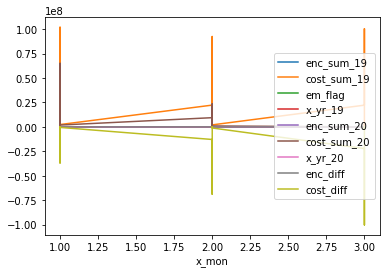

In [20]:
cost_2019=prh_cost.loc[prh_cost['x_yr']==2019]
cost_2020=prh_cost.loc[prh_cost['x_yr']==2020]
by_var=['x_mon','tos1','tos2','tos3','em_flag']
trend=cost_2019.merge( cost_2020\
                      ,left_on=by_var\
                      ,right_on=by_var\
                      ,suffixes=('_19', '_20'))
trend['enc_diff']=trend['enc_sum_20']-trend['enc_sum_19']
trend['cost_diff']=trend['cost_sum_20']-trend['cost_sum_19']
trend.plot(kind='line',x='x_mon',y=)
#[['x_mon','tos1','tos2','tos3','em_flag','enc_diff','cost_diff']].head()